## LAB - Sarcasm Detector

## LAB

*   Analyze input data, determine the sequence length (max)
*   Train BERT Sequence Classifier to detect sarcasm in the given dataset
*   Save the best model in './bert_sarcasm_detection_state_dict.pth'
*   Predict the sacasm for some headlines


### Download data and import packages

In [1]:
!wget https://github.com/ravi-ilango/odsc2020_nlp/blob/main/lab3/sarcasm_data.zip?raw=true -O sarcasm_data.zip

!unzip sarcasm_data.zip

--2020-10-27 23:21:11--  https://github.com/ravi-ilango/odsc2020_nlp/blob/main/lab3/sarcasm_data.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ravi-ilango/odsc2020_nlp/raw/main/lab3/sarcasm_data.zip [following]
--2020-10-27 23:21:11--  https://github.com/ravi-ilango/odsc2020_nlp/raw/main/lab3/sarcasm_data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ravi-ilango/odsc2020_nlp/main/lab3/sarcasm_data.zip [following]
--2020-10-27 23:21:11--  https://raw.githubusercontent.com/ravi-ilango/odsc2020_nlp/main/lab3/sarcasm_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

In [2]:
!pip install pytorch_pretrained_bert

In [3]:
!pip install --upgrade urllib3

Requirement already up-to-date: urllib3 in /usr/local/lib/python3.6/dist-packages (1.25.11)


In [4]:
# imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import trange
import numpy as np
import pandas as pd
import os
import json

import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
model_path = './bert_sarcasm_detection_state_dict.pth'

### Load data and explore

In [6]:
def read_json(json_file):
    json_data = []
    file = open(json_file)
    for line in file:
        json_line = json.loads(line)
        json_data.append(json_line)
    return json_data

json_data = []
for json_file in ['./sarcasm_data/Sarcasm_Headlines_Dataset.json',  './sarcasm_data/Sarcasm_Headlines_Dataset_v2.json']:
    json_data = json_data + read_json(json_file)

In [7]:
df = pd.DataFrame(json_data)

headline_data_train = df.headline.values
is_sarcastic_label_train = df.is_sarcastic.values

print(headline_data_train.shape)

(55328,)


In [21]:
for _, row in df[df.is_sarcastic==1].head().iterrows():
  print (f"\n{row.headline}")


mom starting to fear son's web series closest thing she will have to grandchild

boehner just wants wife to listen, not come up with alternative debt-reduction ideas

top snake handler leaves sinking huckabee campaign

nuclear bomb detonates during rehearsal for 'spider-man' musical

cosby lawyer asks why accusers didn't come forward to be smeared by legal team years ago


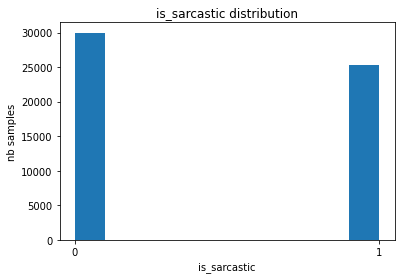

In [8]:
labels = is_sarcastic_label_train
plt.hist(labels)
plt.xlabel('is_sarcastic')
plt.ylabel('nb samples')
plt.title('is_sarcastic distribution')
plt.xticks(np.arange(len(np.unique(labels))));

### YOUR CODE STARTS HERE